In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ge = pd.read_csv('data/barton/Barton_combined.csv')

In [3]:
ge

,Gene,Snf2_rep01,Snf2_rep02,Snf2_rep03,Snf2_rep04,Snf2_rep05,Snf2_rep06,Snf2_rep07,Snf2_rep08,Snf2_rep09,...,WT_rep39,WT_rep40,WT_rep41,WT_rep42,WT_rep43,WT_rep44,WT_rep45,WT_rep46,WT_rep47,WT_rep48
0,15S_rRNA,4,2,5,5,46,3,5,4,2,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,31,18,23,44,356,62,35,33,13,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,5,1,3,1,2,1,1,4,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,205,196,211,252,127,146,275,160,190,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,210,103,159,260,298,522,303,96,132,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [4]:
cols_wt = [c for c in ge.columns if c.startswith('WT')]
cols_mut = [c for c in ge.columns if c.startswith('Snf2')]
cols_all = cols_wt + cols_mut

In [7]:
df

,Gene,Snf2_rep01,Snf2_rep02,Snf2_rep03,Snf2_rep04,Snf2_rep05,Snf2_rep06,Snf2_rep07,Snf2_rep08,Snf2_rep09,...,WT_rep40,WT_rep41,WT_rep42,WT_rep43,WT_rep44,WT_rep45,WT_rep46,WT_rep47,WT_rep48,mean
1,21S_rRNA,31,18,23,44,356,62,35,33,13,...,274,49,30,72,58,21,159,107,70,105.489583
3,ICR1,205,196,211,252,127,146,275,160,190,...,177,137,118,113,81,142,94,187,106,147.989583
4,LSR1,210,103,159,260,298,522,303,96,132,...,385,232,149,114,81,109,132,243,128,213.604167
52,RUF20,237,109,144,196,124,114,273,100,154,...,168,141,105,141,30,103,108,160,88,135.062500
56,RUF5-1,472,217,267,409,291,377,619,301,292,...,380,326,197,554,102,318,198,351,350,342.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,snR63,134,71,73,97,82,265,134,87,103,...,140,105,101,106,64,130,85,161,75,104.031250
6820,snR82,180,113,117,200,132,272,191,114,151,...,127,96,67,77,29,74,52,106,67,114.489583
6822,snR84,153,103,79,138,108,37,163,92,117,...,123,130,79,96,49,147,56,134,112,107.979167
6824,snR86,1328,897,1063,1265,935,1498,1757,823,869,...,1125,776,593,881,437,796,653,1045,819,925.593750


In [8]:
for rounds in range(0,20):
    
    ge['mean'] = ge[cols_all].mean(axis=1)
    df = ge[ge['mean'] >= 100]
    
    for c in cols_all:
        mrat = np.median(df[c] / df['mean'])
        ge[c] = ge[c] / mrat

In [9]:
ge['WT_mean'] = ge[cols_wt].mean(axis=1)
ge['Snf2_mean'] = ge[cols_mut].mean(axis=1)

In [10]:
ge['exp_min'] = ge[cols_all].min(axis=1)

ge = ge[ge['exp_min'] > 0].copy()

ge['all_mean'] = ge[cols_all].mean(axis=1)
ge['wt_mean']  = ge[cols_wt].mean(axis=1)
ge['mut_mean'] = ge[cols_mut].mean(axis=1)

ge['all_std'] = ge[cols_all].std(axis=1)
ge['wt_std']  = ge[cols_wt].std(axis=1)
ge['mut_std'] = ge[cols_mut].std(axis=1)

ge['all_median'] = ge[cols_all].median(axis=1)
ge['wt_median']  = ge[cols_wt].median(axis=1)
ge['mut_median'] = ge[cols_mut].median(axis=1)

ge['true_de'] = np.log(ge['mut_median'] / ge['wt_median'])/np.log(2)
ge['abs_true_de'] = np.abs(ge['true_de'])

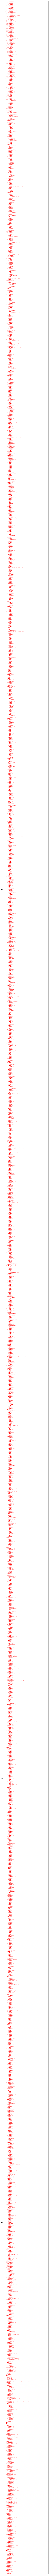

In [15]:
df = ge.copy()

df = df[df[cols_all].min(axis=1) > 10]
df = df.sort_values('wt_mean',ascending=False)

# center
for c in cols_all:
    df[c] = (df[c]-df['all_mean'])/df['all_mean']
    
y = []
x = []

row = 0
for i,r in df.iterrows():
    for c in cols_wt:
        y.append(row+1)
        x.append(r[c])
    row = row + 1
        
fig = plt.figure(figsize = (10,.1*max(y)))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(max(y),0)
ax.scatter(x,y,s=12,alpha=.25,c='r',edgecolor='none')

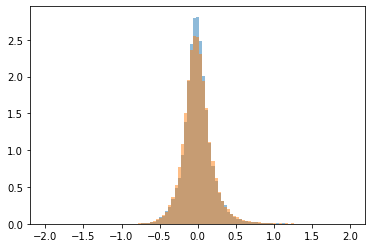

In [35]:
df = ge.copy()

df = df[df[cols_all].min(axis=1) > 10]
df = df.sort_values('wt_mean',ascending=False)

# center
for c in cols_wt:
    df[c] = (df[c]-df['wt_mean'])/df['wt_mean']

#h = plt.hist(df.head(1000)[cols_wt].values.flatten(),bins=np.linspace(-2,2,100),density=True)
h = plt.hist(df.head(2000).tail(1000)[cols_wt].values.flatten(),bins=np.linspace(-2,2,100),density=True,alpha=.5)
h = plt.hist(df.tail(2000).head(1000)[cols_wt].values.flatten(),bins=np.linspace(-2,2,100),density=True,alpha=.5)
#h = plt.hist(df.tail(1000)[cols_wt].values.flatten(),bins=np.linspace(-2,2,100),density=True,alpha=.5)

In [37]:
from scipy.stats.stats import pearsonr 

import os

import scipy
from scipy import stats
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats.mstats import gmean
from scipy.stats import linregress

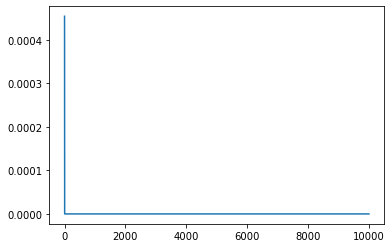

In [49]:
plt.plot(rv.pmf(np.linspace(1,200000,10000)))

In [103]:
rv = nbinom(n=10000000,p=1-1/100000)

In [104]:
rv.mean()

100.001000009545

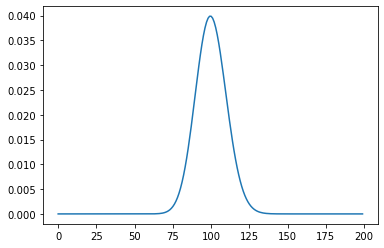

In [105]:
x = np.arange(0,max(10,int(2*rv.mean())))
plt.plot(x,rv.pmf(x))

Text(0, 0.5, 'std')

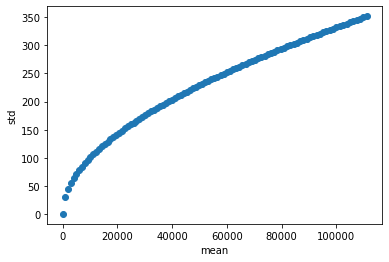

In [106]:
nbx = []
nby = []

for p in np.linspace(1/1000000,1/10,100):        
    rv = nbinom(n=1000000,p=1-p)
    nbx.append(rv.mean())
    nby.append(rv.std())
plt.scatter(nbx,nby)
plt.xlabel('mean')
plt.ylabel('std')

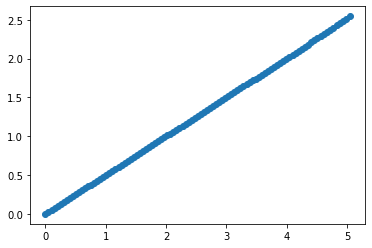

In [122]:
nbx = []
nby = []

x = np.linspace(np.log10(1/1000000),np.log10(1/10),100)

for p in np.power(10,x): 
    rv = nbinom(n=1000000,p=1-p)
    nbx.append(np.log10(rv.mean()))
    nby.append(np.log10(rv.std()))
plt.scatter(nbx,nby)

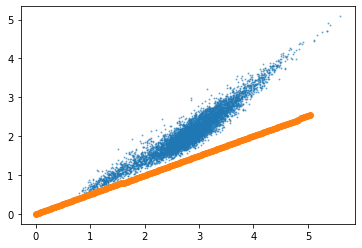

In [130]:
plt.scatter(np.log10(ge['wt_mean']),np.log10(ge['wt_std']),s=1,alpha=.5)
plt.scatter(nbx,nby)